In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns

In [2]:
dados = pd.read_csv('./train.csv')
#pd.set_option('display.max_rows', None)

In [3]:
#dados.head()

In [4]:
#dados.tail()

In [5]:
#dados.info()

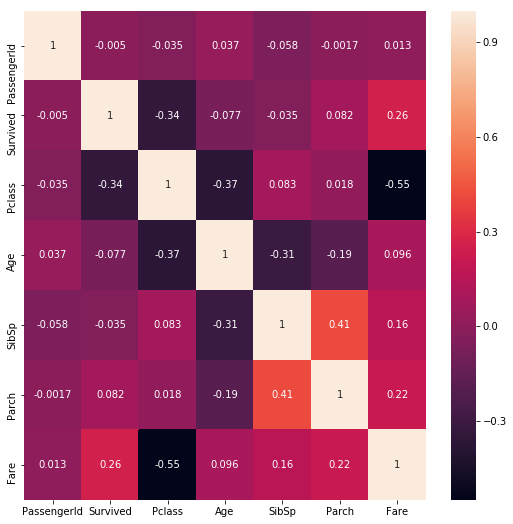

In [6]:
plt.figure(figsize = (9,9))
sns.heatmap(dados.corr(),annot = True)

In [7]:
dados = dados.drop(['Name','Parch','Ticket','Cabin',"Embarked"],axis =1)

In [8]:
dados = dados.drop(['SibSp'],axis=1)

In [9]:
dados.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,male,22.0,7.2500
1,2,1,1,female,38.0,71.2833
2,3,1,3,female,26.0,7.9250
3,4,1,1,female,35.0,53.1000
4,5,0,3,male,35.0,8.0500
5,6,0,3,male,NaN,8.4583
6,7,0,1,male,54.0,51.8625
7,8,0,3,male,2.0,21.0750
8,9,1,3,female,27.0,11.1333
9,10,1,2,female,14.0,30.0708


In [10]:
def sex(x):
    if x == 'male':
        return 0
    if x == 'female':
        return 1

In [11]:
dados['Sex'] = dados['Sex'].apply(sex)

In [12]:
dados

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,0,22.0,7.2500
1,2,1,1,1,38.0,71.2833
2,3,1,3,1,26.0,7.9250
3,4,1,1,1,35.0,53.1000
4,5,0,3,0,35.0,8.0500
5,6,0,3,0,NaN,8.4583
6,7,0,1,0,54.0,51.8625
7,8,0,3,0,2.0,21.0750
8,9,1,3,1,27.0,11.1333
9,10,1,2,1,14.0,30.0708


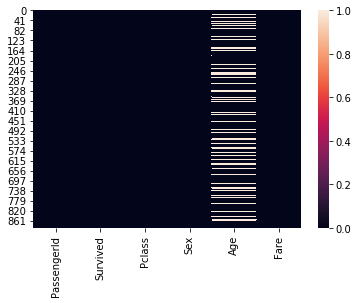

In [13]:
sns.heatmap(dados.isnull())

In [14]:
#Podemos retirar os dados que são NaN

#dados = dados.dropna().reset_index().drop('index',axis=1)

In [15]:
# tudo que for NaN vira valor Médio
def media_age(x):
    if np.isnan(x) == True :
        return int(dados['Age'].mean())
        
    else:
        return x

    
dados['Age'] = dados['Age'].apply(media_age)

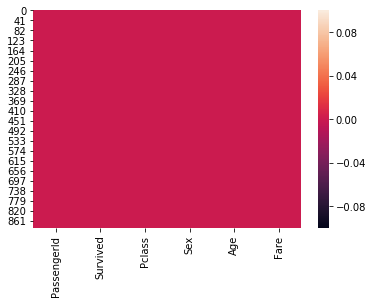

In [16]:
sns.heatmap(dados.isnull())

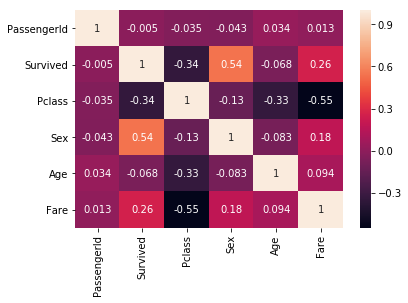

In [17]:
sns.heatmap(dados.corr(),annot = True)

In [18]:
X = dados.drop('Survived',axis=1)
y = dados[['Survived']]

In [19]:
X.shape,y.shape

((891, 5), (891, 1))

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
)

In [22]:
X_train.shape,y_train.shape

((623, 5), (623, 1))

In [23]:
X_test.shape,y_test.shape

((268, 5), (268, 1))

In [24]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (X_train.shape[1],)
))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (X_train.shape[1],)
))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (X_train.shape[1],)
))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (X_train.shape[1],)
))

model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    input_shape = (X_train.shape[1],)
))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    
))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = 'relu',
    
))

model.add(tf.keras.layers.Dense(
    units = 1,
    activation = 'sigmoid',
))

model.summary()

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0

In [25]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs = 100)

history.history.keys()

Train on 560 samples, validate on 63 samples
Epoch 1/100
560/560 [==============================] - 1s 2ms/sample - loss: 1.0013 - accuracy: 0.6036 - val_loss: 0.6872 - val_accuracy: 0.6032
Epoch 2/100
560/560 [==============================] - 0s 178us/sample - loss: 0.7356 - accuracy: 0.5804 - val_loss: 0.6879 - val_accuracy: 0.6190
Epoch 3/100
560/560 [==============================] - 0s 178us/sample - loss: 0.7191 - accuracy: 0.6000 - val_loss: 0.6880 - val_accuracy: 0.6190
Epoch 4/100
560/560 [==============================] - 0s 200us/sample - loss: 0.6868 - accuracy: 0.6179 - val_loss: 0.6879 - val_accuracy: 0.6190
Epoch 5/100
560/560 [==============================] - 0s 156us/sample - loss: 0.6918 - accuracy: 0.6018 - val_loss: 0.6874 - val_accuracy: 0.6190
Epoch 6/100
560/560 [==============================] - 0s 136us/sample - loss: 0.6883 - accuracy: 0.6089 - val_loss: 0.6874 - val_accuracy: 0.6190
Epoch 7/100
560/560 [==============================] - 0s 129us/sample - lo

560/560 [==============================] - 0s 117us/sample - loss: 0.6162 - accuracy: 0.6875 - val_loss: 0.6252 - val_accuracy: 0.6667
Epoch 57/100
560/560 [==============================] - 0s 114us/sample - loss: 0.6089 - accuracy: 0.6982 - val_loss: 0.6661 - val_accuracy: 0.5714
Epoch 58/100
560/560 [==============================] - 0s 134us/sample - loss: 0.6169 - accuracy: 0.6714 - val_loss: 0.6156 - val_accuracy: 0.6825
Epoch 59/100
560/560 [==============================] - 0s 156us/sample - loss: 0.5974 - accuracy: 0.6982 - val_loss: 0.6166 - val_accuracy: 0.6825
Epoch 60/100
560/560 [==============================] - 0s 120us/sample - loss: 0.6064 - accuracy: 0.6732 - val_loss: 0.6293 - val_accuracy: 0.6508
Epoch 61/100
560/560 [==============================] - 0s 147us/sample - loss: 0.6087 - accuracy: 0.6964 - val_loss: 0.6071 - val_accuracy: 0.6825
Epoch 62/100
560/560 [==============================] - 0s 184us/sample - loss: 0.6016 - accuracy: 0.6946 - val_loss: 0.6036 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

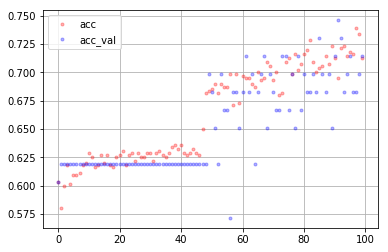

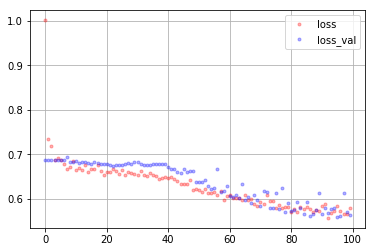

In [26]:
plt.figure()
plt.plot(history.history['accuracy'],'.r', label = 'acc',alpha = 0.3)
plt.plot(history.history['val_accuracy'], '.b', label = 'acc_val',alpha = 0.3)
plt.legend()
plt.grid()

plt.figure()
plt.plot(history.history['loss'],'.r', label = 'loss',alpha = 0.3)
plt.plot(history.history['val_loss'],'.b', label = 'loss_val',alpha = 0.3)
plt.legend()
plt.grid()

## PREDIÇÕES

#### Dados de Treino

In [27]:
pred_train = model.predict(X_train)
pred_train.shape

(623, 1)

In [28]:
pred_df = pd.DataFrame()
pred_df['pred'] = pred_train[:,0]
#pred_df

In [29]:
def cond(x):
    if x > 0.5:
        return 1
    else:
        return 0

In [30]:
pred_df['pred'] = pred_df['pred'].apply(cond)

In [31]:
pred_df

,pred
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,0
9,0


In [32]:
y_train_pred = y_train.join(pred_df)

In [33]:
y_train_pred

,Survived,pred
93,0,0.0
879,1,NaN
729,0,NaN
501,0,0.0
724,1,NaN
539,1,0.0
854,0,NaN
784,0,NaN
815,0,NaN
832,0,NaN


In [34]:
k = 0
total = len(y_train_pred['pred'])

for x,y in zip(y_train_pred['pred'],y_train_pred['Survived']):
    if x == y:
        k = k+1
p = k/total
print(f"Porcentagem de Acerto {np.around(p*100,2)}%")

Porcentagem de Acerto 38.52%


#### Dados de Teste

In [35]:
pred_test = model.predict(X_test)
pred_test.shape

(268, 1)

In [36]:
pred_df_test = pd.DataFrame()
pred_df_test['pred'] = pred_test[:,0]
#pred_df

In [37]:
def cond(x):
    if x > 0.5:
        return 1
    else:
        return 0

In [38]:
pred_df_test['pred'] = pred_df_test['pred'].apply(cond)

In [39]:
pred_df_test

,pred
0,0
1,1
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,0


In [40]:
y_test_pred = y_test.join(pred_df)

In [41]:
y_test_pred

,Survived,pred
17,1,0.0
659,0,NaN
374,0,0.0
165,1,0.0
382,0,0.0
571,1,1.0
629,0,NaN
872,0,NaN
57,0,0.0
301,1,0.0


In [42]:
k = 0
total = len(y_test_pred['pred'])

for x,y in zip(y_test_pred['pred'],y_test_pred['Survived']):
    if x == y:
        k = k+1
p = k/total
print(f"Porcentagem de Acerto {np.around(p*100,2)}%")

Porcentagem de Acerto 36.19%
